<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/dimensionality/%D0%A1%D0%B8%D0%BD%D0%B3%D1%83%D0%BB%D1%8F%D1%80%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D0%B7%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_(SVD)_%D0%B8_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82_(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Сингулярное разложение (SVD) и метод главных компонент (PCA)

В этой лекции мы обсудим два важнейших инструмента в машинном обучении: сингулярное разложение (SVD) и метод главных компонент (PCA). Метод главных компонент (PCA) — это линейный метод снижения размерности данных, который был впервые предложен Пирсоном в 1901 году. Он широко используется в задачах анализа данных и известен под разными названиями, такими как преобразование Карунена-Лоэва, преобразование Хотеллинга и сингулярное разложение по собственным значениям (Proper Orthogonal Decomposition, POD). PCA применяется к набору данных, состоящему из $n$ векторов $x_1, \dots, x_n \in \mathbb{R}^d$, и возвращает новый базис для пространства $\mathbb{R}^d$, элементы которого называются главными компонентами. Важно отметить, что этот метод полностью зависит от данных, то есть новый базис формируется исключительно на основе данных. PCA основывается на сингулярном разложении (SVD) или спектральной теореме, поэтому мы начнем с рассмотрения SVD.



### 1.1 Сингулярное разложение (SVD)

Рассмотрим матрицу $A \in \mathbb{R}^{m \times n}$ или $\mathbb{C}^{m \times n}$, и предположим, что $m \geq n$. Тогда сингулярное разложение (SVD) матрицы $A$ задается формулой:

$$
A = U D W^*,
$$

где:
- $U$ — унитарная матрица размера $m \times m$ (то есть $U^*U = UU^* = I_m$),
- $D$ — диагональная (прямоугольная) матрица размера $m \times n$,
- $W$ — унитарная матрица размера $n \times n$ (то есть $W^*W = WW^* = I_n$).

Матрица $D$ имеет вид:

$$
D = \begin{bmatrix}
\sigma_1 & 0 & \dots & 0 \\
0 & \sigma_2 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & \sigma_n \\
0 & 0 & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & 0
\end{bmatrix},
$$

где $\sigma_i > 0$ — сингулярные значения матрицы $A$, расположенные в порядке убывания: $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r > 0$. Здесь $r$ — ранг матрицы $A$, и $r \leq n$.

Столбцы матрицы $U$ называются левыми сингулярными векторами, а столбцы матрицы $W$ — правыми сингулярными векторами. Если обозначить $U = [u_1, \dots, u_m]$ и $W = [w_1, \dots, w_n]$, то SVD можно записать в виде:

$$
A = \sum_{i=1}^r \sigma_i u_i w_i^*.
$$

Это означает, что матрица $A$ представляется в виде суммы взвешенных матриц ранга 1.



#### Замечания о SVD:
1. **Связь с собственными значениями:**
   - Векторы $u_i$ являются собственными векторами матрицы $AA^*$, а векторы $w_i$ — собственными векторами матрицы $A^*A$.
   - Матрицы $AA^*$ и $A^*A$ являются положительно полуопределенными, поэтому их собственные значения неотрицательны.
   - Если $\lambda_i$ — собственные значения матрицы $A^*A$, то $\sigma_i^2 = \lambda_i$ для $\lambda_i > 0$.

2. **Случай квадратной матрицы:**
   - Если матрица $A$ квадратная и эрмитова, то SVD совпадает с её спектральным разложением.

3. **Альтернативное определение:**
   - SVD можно определить иначе, с матрицей $U$ размера $m \times n$, диагональной матрицей $D$ размера $n \times n$ и матрицей $W$ размера $n \times n$. В этом случае $U^*U = I_n$, а $W^*W = WW^* = I_n$.


#### Интуиция за SVD:
SVD можно интерпретировать как вращение матрицы $A$ с помощью матриц $U$ и $W^*$, чтобы преобразовать её в диагональную матрицу $D$. Это позволяет выделить наиболее важные направления (сингулярные векторы) и соответствующие им масштабы (сингулярные значения).



### 2. Метод главных компонент (PCA)

#### 2.1 Мотивация
Пусть даны векторы $x_1, \dots, x_n \in \mathbb{R}^d$. Мы хотим спроецировать эти векторы на подпространство меньшей размерности $\mathbb{R}^k$, где $k < d$. Как выбрать $k$ и ориентацию подпространства? Рассмотрим две идеи:

1. **Наилучшее приближение:**
   Найти $k$-мерное подпространство, на котором проекции векторов $x_1, \dots, x_n$ наилучшим образом приближают исходные точки. "Наилучшее" здесь определяется в смысле минимизации евклидовой нормы (2-нормы).

2. **Сохранение дисперсии:**
   Найти $k$-мерную проекцию, которая сохраняет большую часть дисперсии данных. Это позволяет сохранить различия между точками данных.

Обе эти задачи решаются с помощью метода главных компонент (PCA).



#### 2.2 Формулировка задачи оптимизации
Обозначим выборочное среднее как:

$$
\mu_n := \frac{1}{n} \sum_{i=1}^n x_i,
$$

а выборочную ковариационную матрицу как:

$$
\Sigma_n := \frac{1}{n} \sum_{i=1}^n (x_i - \mu_n)(x_i - \mu_n)^*.
$$

Рассмотрим первую идею из раздела 2.1. Мы хотим приблизить каждый вектор $x_i$ аффинным подпространством меньшей размерности:

$$
x_i \approx \mu + \sum_{j=1}^k (\alpha_i)_j v_j,
$$

где $V := [v_1, \dots, v_k]$ — ортонормированный базис, который нужно определить. Это можно переписать в виде:

$$
x_i \approx \mu + V \alpha_i,
$$

где $\alpha_i = \begin{bmatrix} \alpha_{i1} \\ \alpha_{i2} \\ \vdots \\ \alpha_{ik} \end{bmatrix}$, а $V$ — матрица размера $n \times k$, удовлетворяющая условию $V^*V = I_k$.

Теперь задача оптимизации формулируется следующим образом:

$$
\min_{\mu, V, \alpha_1, \dots, \alpha_n} \sum_{i=1}^n \| x_i - (\mu + V \alpha_i) \|^2 \quad \text{при условии} \quad V^*V = I_k.
$$

Мы минимизируем среднеквадратичную ошибку (l2-ошибку) для всех векторов $x_i$. В отличие от подхода Джонсона-Линденштрауса (JL), мы не стремимся минимизировать ошибку равномерно для всех $x_i$, а скорее минимизируем среднюю ошибку.




Теперь подробно рассмотрим, как решается задача оптимизации, возникающая в методе главных компонент (PCA). Мы покажем, как можно разделить задачу на несколько этапов и последовательно оптимизировать по каждому из параметров.



### 2.3 Решение задачи оптимизации

Задача оптимизации в PCA формулируется следующим образом:

$$
\min_{\mu, V, \alpha_1, \dots, \alpha_n} \sum_{i=1}^n \| x_i - (\mu + V \alpha_i) \|^2 \quad \text{при условии} \quad V^*V = I_k.
$$

К счастью, эту задачу можно разделить на несколько этапов: сначала оптимизировать по $\mu$, затем по $\alpha_i$, и, наконец, по $V$. Это возможно благодаря свойству разделения переменных, которое применимо в данном случае.



#### 2.3.1 Оптимизация по $\mu$

Начнем с оптимизации по $\mu$. Без потери общности можно предположить, что:

$$
\sum_{i=1}^n \alpha_i = 0,
$$

так как в противном случае ненулевое значение $\sum_{i=1}^n \alpha_i$ можно было бы включить в $\mu$. Теперь вычислим производную целевой функции $I$ по $\mu$:

$$
\frac{\partial I}{\partial \mu} = -2 \sum_{i=1}^n (x_i - \mu - V \alpha_i).
$$

Приравняв производную к нулю, получаем:

$$
\mu = \frac{1}{n} \sum_{i=1}^n x_i = \mu_n.
$$

Таким образом, оптимальное значение $\mu$ совпадает с выборочным средним $\mu_n$.



#### 2.3.2 Оптимизация по $\alpha_i$

Теперь оптимизируем по $\alpha_i$. Вычислим производную целевой функции $I$ по $\alpha_i$:

$$
\frac{\partial I}{\partial \alpha_i} = (x_i - \mu - V \alpha_i)^* V.
$$

Приравняв производную к нулю, получаем:

$$
\alpha_i = V^* (x_i - \mu).
$$

Подставляя найденные выражения для $\mu$ и $\alpha_i$ в целевую функцию $I$, получаем:

$$
I = \sum_{i=1}^n \| x_i - \mu_n - V V^* (x_i - \mu_n) \|^2,
$$

где $V V^*$ — матрица ортогональной проекции. Обозначим $y_i = x_i - \mu_n$, тогда:

$$
I = \sum_{i=1}^n \| y_i - V V^* y_i \|^2.
$$



#### 2.3.3 Оптимизация по $V$

Теперь задача сводится к минимизации:

$$
\min_{V: V^*V = I_k} \sum_{i=1}^n \| y_i - V V^* y_i \|^2.
$$

Обозначим $Y = [y_1, \dots, y_n]$. Тогда:

$$
I = \sum_{i=1}^n \| y_i - V V^* y_i \|^2 = \text{trace} \left[ (Y - V V^* Y)^* (Y - V V^* Y) \right].
$$

Используя свойства следа (линейность и циклическую перестановку), а также тот факт, что $(I - V V^*)(I - V V^*) = I - V V^*$, получаем:

$$
I = \text{trace} \left[ Y^* (I - V V^*) (I - V V^*) Y \right] = \text{trace} \left[ Y^* (I - V V^*) Y \right].
$$

Раскрывая выражение, получаем:

$$
I = \text{trace} (Y^* Y) - \text{trace} (Y^* V V^* Y).
$$

Поскольку $\text{trace} (Y^* Y)$ не зависит от $V$, задача минимизации $I$ эквивалентна задаче максимизации:

$$
\max_{V: V^*V = I_k} \text{trace} (V^* Y Y^* V).
$$

Обозначим $\Sigma_n = \frac{1}{n} Y Y^*$. Тогда задача принимает вид:

$$
\max_{V: V^*V = I_k} \text{trace} (V^* \Sigma_n V).
$$



#### 2.3.4 Связь с собственными значениями

Пусть $\Sigma_n$ имеет спектральное разложение:

$$
\Sigma_n = \sum_{i=1}^d \lambda_i v_i v_i^*,
$$

где $\lambda_i \geq 0$ — собственные значения, а $v_i$ — соответствующие собственные векторы. Поскольку $\Sigma_n$ является положительно полуопределенной матрицей, все её собственные значения неотрицательны.

Из линейной алгебры известно, что:

$$
\max_{V: V^*V = I_k} \text{trace} (V^* \Sigma_n V) = \sum_{i=1}^k \lambda_i,
$$

и максимум достигается, когда $V = [v_1, \dots, v_k]$, то есть когда $V$ состоит из $k$ собственных векторов, соответствующих наибольшим собственным значениям $\lambda_1, \dots, \lambda_k$.



### 2.4 Интуиция за PCA

PCA использует спектральное разложение выборочной ковариационной матрицы $\Sigma_n$ и анализирует проекцию центрированных данных (центрирование = вычитание выборочного среднего $\mu_n$) на $k$ главных собственных векторов $\Sigma_n$. Эти собственные векторы называются главными компонентами, и они соответствуют направлениям с наибольшей дисперсией в данных.



### 2.5 Вычислительная сложность PCA

Вычислительная сложность PCA без использования SVD включает следующие этапы:
1. Построение ковариационной матрицы $\Sigma_n$: $O(n d^2)$ операций.
2. Нахождение собственных векторов $V$: $O(d^3)$ операций.

Однако использование SVD позволяет снизить вычислительную сложность. Пусть $X = [x_1, \dots, x_n]$, и $1_n$ — вектор из единиц длины $n$. Тогда:

$$
\Sigma_n = \frac{1}{n} (X - \mu_n 1_n^*) (X - \mu_n 1_n^*)^*.
$$

Вычислив SVD матрицы $A = X - \mu_n 1_n^*$, мы получим левые сингулярные векторы $v_1, \dots, v_n$, которые совпадают с собственными векторами $\Sigma_n$. Сложность вычисления SVD составляет $O(\min\{n^2 d, n d^2\})$.

Если нам нужны только первые $k$ сингулярных векторов, то сложность снижается до $O(d n k)$. В MATLAB это можно сделать с помощью команды `svds`. Для больших данных также используются рандомизированные алгоритмы SVD, которые позволяют снизить сложность до $O(n d \log(k) + (n + d) k^2)$.



### 2.6 Дополнительное свойство SVD

Пусть $A \in \mathbb{R}^{m \times n}$ и $A = \sum_{i=1}^n \sigma_i u_i w_i^*$ — её сингулярное разложение. Обозначим $A_k = \sum_{i=1}^k \sigma_i u_i w_i^*$ для $k < n$. Тогда для любой матрицы $B$ ранга не более $k$ выполняется следующее свойство наилучшего приближения:

$$
\| A - A_k \|_{\text{op}} \leq \| A - B \|_{\text{op}},
$$

где $\| \cdot \|_{\text{op}}$ — операторная норма, и $\| A - A_k \|_{\text{op}} = \sigma_{k+1}$. Таким образом, $A_k$ является наилучшим приближением матрицы $A$ ранга $k$.



В этом разделе мы подробно рассмотрели, как решается задача оптимизации в методе главных компонент (PCA). Мы показали, как можно разделить задачу на несколько этапов и последовательно оптимизировать по каждому из параметров. Также мы обсудили вычислительную сложность PCA и преимущества использования SVD для снижения затрат на вычисления. Эти методы являются ключевыми для анализа данных и снижения их размерности в машинном обучении.









##Примеры

Пример 1.
Рассмотрим конкретный пример сингулярного разложения для матрицы $A \in \mathbb{R}^{3 \times 2}$. Пусть:

$$
A = \begin{bmatrix}
3 & 0 \\
0 & -2 \\
0 & 0
\end{bmatrix}.
$$

Наша цель — найти сингулярное разложение $A = U D W^*$, где:
- $U$ — унитарная матрица размера $3 \times 3$,
- $D$ — диагональная матрица размера $3 \times 2$,
- $W$ — унитарная матрица размера $2 \times 2$.



#### Шаг 1: Нахождение сингулярных значений

Сингулярные значения $\sigma_i$ матрицы $A$ — это квадратные корни из собственных значений матрицы $A^*A$. Сначала вычислим $A^*A$:

$$
A^*A = \begin{bmatrix}
3 & 0 & 0 \\
0 & -2 & 0
\end{bmatrix}
\begin{bmatrix}
3 & 0 \\
0 & -2 \\
0 & 0
\end{bmatrix}
= \begin{bmatrix}
9 & 0 \\
0 & 4
\end{bmatrix}.
$$

Теперь найдем собственные значения $\lambda_i$ матрицы $A^*A$. Для этого решим характеристическое уравнение:

$$
\det(A^*A - \lambda I) = 0.
$$

Подставляем:

$$
\det \begin{bmatrix}
9 - \lambda & 0 \\
0 & 4 - \lambda
\end{bmatrix} = (9 - \lambda)(4 - \lambda) = 0.
$$

Корни уравнения: $\lambda_1 = 9$, $\lambda_2 = 4$. Сингулярные значения $\sigma_i$ равны квадратным корням из $\lambda_i$:

$$
\sigma_1 = \sqrt{9} = 3, \quad \sigma_2 = \sqrt{4} = 2.
$$

Таким образом, диагональная матрица $D$ имеет вид:

$$
D = \begin{bmatrix}
3 & 0 \\
0 & 2 \\
0 & 0
\end{bmatrix}.
$$



#### Шаг 2: Нахождение правых сингулярных векторов $W$

Правые сингулярные векторы $w_i$ — это собственные векторы матрицы $A^*A$. Найдем их для каждого собственного значения.

1. Для $\lambda_1 = 9$:

$$
(A^*A - 9I) w_1 = 0 \implies \begin{bmatrix}
0 & 0 \\
0 & -5
\end{bmatrix} w_1 = 0.
$$

Решением является вектор $w_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix}$.

2. Для $\lambda_2 = 4$:

$$
(A^*A - 4I) w_2 = 0 \implies \begin{bmatrix}
5 & 0 \\
0 & 0
\end{bmatrix} w_2 = 0.
$$

Решением является вектор $w_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$.

Таким образом, матрица $W$ имеет вид:

$$
W = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}.
$$



#### Шаг 3: Нахождение левых сингулярных векторов $U$

Левые сингулярные векторы $u_i$ — это собственные векторы матрицы $AA^*$. Сначала вычислим $AA^*$:

$$
AA^* = \begin{bmatrix}
3 & 0 \\
0 & -2 \\
0 & 0
\end{bmatrix}
\begin{bmatrix}
3 & 0 & 0 \\
0 & -2 & 0
\end{bmatrix}
= \begin{bmatrix}
9 & 0 & 0 \\
0 & 4 & 0 \\
0 & 0 & 0
\end{bmatrix}.
$$

Собственные значения $AA^*$ совпадают с собственными значениями $A^*A$, то есть $\lambda_1 = 9$, $\lambda_2 = 4$, $\lambda_3 = 0$. Найдем собственные векторы для каждого собственного значения.

1. Для $\lambda_1 = 9$:

$$
(AA^* - 9I) u_1 = 0 \implies \begin{bmatrix}
0 & 0 & 0 \\
0 & -5 & 0 \\
0 & 0 & -9
\end{bmatrix} u_1 = 0.
$$

Решением является вектор $u_1 = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}$.

2. Для $\lambda_2 = 4$:

$$
(AA^* - 4I) u_2 = 0 \implies \begin{bmatrix}
5 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & -4
\end{bmatrix} u_2 = 0.
$$

Решением является вектор $u_2 = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}$.

3. Для $\lambda_3 = 0$:

$$
(AA^* - 0I) u_3 = 0 \implies \begin{bmatrix}
9 & 0 & 0 \\
0 & 4 & 0 \\
0 & 0 & 0
\end{bmatrix} u_3 = 0.
$$

Решением является вектор $u_3 = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}$.

Таким образом, матрица $U$ имеет вид:

$$
U = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}.
$$



#### Шаг 4: Проверка SVD

Теперь подставим найденные матрицы $U$, $D$, $W$ в формулу SVD:

$$
A = U D W^*.
$$

Подставляем:

$$
A = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
3 & 0 \\
0 & 2 \\
0 & 0
\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}.
$$

Выполним умножение:

$$
A = \begin{bmatrix}
3 & 0 \\
0 & 2 \\
0 & 0
\end{bmatrix},
$$

что совпадает с исходной матрицей $A$. Таким образом, SVD выполнено корректно.



### Итог

Мы рассмотрели конкретный пример сингулярного разложения для матрицы:

$$
A = \begin{bmatrix}
3 & 0 \\
0 & -2 \\
0 & 0
\end{bmatrix}.
$$

SVD этой матрицы имеет вид:

$$
A = U D W^*,
$$

где:

$$
U = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}, \quad
D = \begin{bmatrix}
3 & 0 \\
0 & 2 \\
0 & 0
\end{bmatrix}, \quad
W = \begin{bmatrix}
1 & 0 \\
0 & 1
\end{bmatrix}.
$$

Этот пример иллюстрирует, как SVD раскладывает матрицу на сингулярные значения и векторы, что позволяет выделить наиболее важные направления в данных.




Пример 2. Рассмотрим конкретный пример применения метода главных компонент (PCA) для набора данных. Пусть у нас есть три точки в двумерном пространстве:

$$
x_1 = \begin{bmatrix} 1 \\ 2 \end{bmatrix}, \quad
x_2 = \begin{bmatrix} 2 \\ 3 \end{bmatrix}, \quad
x_3 = \begin{bmatrix} 3 \\ 4 \end{bmatrix}.
$$

Наша цель — спроецировать эти точки на одномерное подпространство ($k = 1$), сохранив максимальную дисперсию данных.



#### Шаг 1: Вычисление выборочного среднего $\mu_n$

Сначала найдем выборочное среднее $\mu_n$:

$$
\mu_n = \frac{1}{n} \sum_{i=1}^n x_i = \frac{1}{3} \left( \begin{bmatrix} 1 \\ 2 \end{bmatrix} + \begin{bmatrix} 2 \\ 3 \end{bmatrix} + \begin{bmatrix} 3 \\ 4 \end{bmatrix} \right) = \frac{1}{3} \begin{bmatrix} 6 \\ 9 \end{bmatrix} = \begin{bmatrix} 2 \\ 3 \end{bmatrix}.
$$



#### Шаг 2: Центрирование данных

Теперь вычтем выборочное среднее из каждой точки, чтобы центрировать данные:

$$
y_1 = x_1 - \mu_n = \begin{bmatrix} 1 \\ 2 \end{bmatrix} - \begin{bmatrix} 2 \\ 3 \end{bmatrix} = \begin{bmatrix} -1 \\ -1 \end{bmatrix},
$$
$$
y_2 = x_2 - \mu_n = \begin{bmatrix} 2 \\ 3 \end{bmatrix} - \begin{bmatrix} 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix},
$$
$$
y_3 = x_3 - \mu_n = \begin{bmatrix} 3 \\ 4 \end{bmatrix} - \begin{bmatrix} 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}.
$$

Таким образом, центрированные данные:

$$
Y = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}.
$$



#### Шаг 3: Вычисление выборочной ковариационной матрицы $\Sigma_n$

Выборочная ковариационная матрица $\Sigma_n$ вычисляется по формуле:

$$
\Sigma_n = \frac{1}{n} Y Y^*.
$$

Подставляем $Y$:

$$
\Sigma_n = \frac{1}{3} \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix} \begin{bmatrix} -1 & -1 \\ 0 & 0 \\ 1 & 1 \end{bmatrix} = \frac{1}{3} \begin{bmatrix} 2 & 2 \\ 2 & 2 \end{bmatrix} = \begin{bmatrix} \frac{2}{3} & \frac{2}{3} \\ \frac{2}{3} & \frac{2}{3} \end{bmatrix}.
$$



#### Шаг 4: Нахождение собственных значений и собственных векторов $\Sigma_n$

Теперь найдем собственные значения и собственные векторы матрицы $\Sigma_n$. Для этого решим характеристическое уравнение:

$$
\det(\Sigma_n - \lambda I) = 0.
$$

Подставляем:

$$
\det \begin{bmatrix} \frac{2}{3} - \lambda & \frac{2}{3} \\ \frac{2}{3} & \frac{2}{3} - \lambda \end{bmatrix} = \left( \frac{2}{3} - \lambda \right)^2 - \left( \frac{2}{3} \right)^2 = 0.
$$

Раскрываем:

$$
\left( \frac{2}{3} - \lambda \right)^2 - \frac{4}{9} = 0 \implies \lambda^2 - \frac{4}{3} \lambda = 0 \implies \lambda \left( \lambda - \frac{4}{3} \right) = 0.
$$

Корни уравнения: $\lambda_1 = \frac{4}{3}$, $\lambda_2 = 0$.

Теперь найдем собственные векторы для каждого собственного значения.

1. Для $\lambda_1 = \frac{4}{3}$:

$$
(\Sigma_n - \lambda_1 I) v_1 = 0 \implies \begin{bmatrix} -\frac{2}{3} & \frac{2}{3} \\ \frac{2}{3} & -\frac{2}{3} \end{bmatrix} v_1 = 0.
$$

Решением является вектор $v_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$.

2. Для $\lambda_2 = 0$:

$$
(\Sigma_n - \lambda_2 I) v_2 = 0 \implies \begin{bmatrix} \frac{2}{3} & \frac{2}{3} \\ \frac{2}{3} & \frac{2}{3} \end{bmatrix} v_2 = 0.
$$

Решением является вектор $v_2 = \begin{bmatrix} 1 \\ -1 \end{bmatrix}$.



#### Шаг 5: Выбор главной компоненты

Главная компонента соответствует собственному вектору с наибольшим собственным значением. В нашем случае это $v_1 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$, соответствующее $\lambda_1 = \frac{4}{3}$.

Нормализуем $v_1$:

$$
v_1 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}.
$$



#### Шаг 6: Проекция данных на главную компоненту

Теперь спроецируем центрированные данные $Y$ на главную компоненту $v_1$. Проекция вычисляется по формуле:

$$
\alpha_i = v_1^* y_i.
$$

Вычислим проекции:

1. Для $y_1 = \begin{bmatrix} -1 \\ -1 \end{bmatrix}$:

$$
\alpha_1 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \end{bmatrix} \begin{bmatrix} -1 \\ -1 \end{bmatrix} = \frac{1}{\sqrt{2}} (-1 -1) = -\sqrt{2}.
$$

2. Для $y_2 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$:

$$
\alpha_2 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \end{bmatrix} \begin{bmatrix} 0 \\ 0 \end{bmatrix} = 0.
$$

3. Для $y_3 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$:

$$
\alpha_3 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \end{bmatrix} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \frac{1}{\sqrt{2}} (1 + 1) = \sqrt{2}.
$$



#### Шаг 7: Восстановление данных

Теперь восстановим данные в исходном пространстве, используя проекции на главную компоненту:

$$
\hat{y}_i = \alpha_i v_1.
$$

Вычислим восстановленные данные:

1. Для $\alpha_1 = -\sqrt{2}$:

$$
\hat{y}_1 = -\sqrt{2} \cdot \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} -1 \\ -1 \end{bmatrix}.
$$

2. Для $\alpha_2 = 0$:

$$
\hat{y}_2 = 0 \cdot \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}.
$$

3. Для $\alpha_3 = \sqrt{2}$:

$$
\hat{y}_3 = \sqrt{2} \cdot \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}.
$$



#### Шаг 8: Возврат к исходным данным

Теперь добавим выборочное среднее $\mu_n$ к восстановленным данным:

$$
\hat{x}_i = \hat{y}_i + \mu_n.
$$

Вычислим:

1. Для $\hat{y}_1 = \begin{bmatrix} -1 \\ -1 \end{bmatrix}$:

$$
\hat{x}_1 = \begin{bmatrix} -1 \\ -1 \end{bmatrix} + \begin{bmatrix} 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}.
$$

2. Для $\hat{y}_2 = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$:

$$
\hat{x}_2 = \begin{bmatrix} 0 \\ 0 \end{bmatrix} + \begin{bmatrix} 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 2 \\ 3 \end{bmatrix}.
$$

3. Для $\hat{y}_3 = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$:

$$
\hat{x}_3 = \begin{bmatrix} 1 \\ 1 \end{bmatrix} + \begin{bmatrix} 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 3 \\ 4 \end{bmatrix}.
$$



### Итог

Мы применили метод главных компонент (PCA) к набору данных:

$$
x_1 = \begin{bmatrix} 1 \\ 2 \end{bmatrix}, \quad
x_2 = \begin{bmatrix} 2 \\ 3 \end{bmatrix}, \quad
x_3 = \begin{bmatrix} 3 \\ 4 \end{bmatrix}.
$$

Главная компонента была найдена как $v_1 = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}$, и данные были спроецированы на эту компоненту. Восстановленные данные совпали с исходными, так как все точки лежат на одной прямой, и PCA идеально сохранил их структуру.

Этот пример иллюстрирует, как PCA позволяет снизить размерность данных, сохраняя их основные свойства.


### Реализация на Python с визуализацией

Ниже приведена реализация на Python для обоих примеров с использованием библиотек `numpy`, `matplotlib` и `scipy.linalg` для вычисления сингулярного разложения (SVD) и метода главных компонент (PCA). Мы также добавим визуализацию для лучшего понимания.



### Пример 1: Сингулярное разложение (SVD)


Матрица U (левые сингулярные векторы):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Матрица D (сингулярные значения):
[[3. 0.]
 [0. 2.]
 [0. 0.]]

Матрица W^T (правые сингулярные векторы):
[[ 1.  0.]
 [-0. -1.]]

Восстановленная матрица A:
[[ 3.  0.]
 [ 0. -2.]
 [ 0.  0.]]


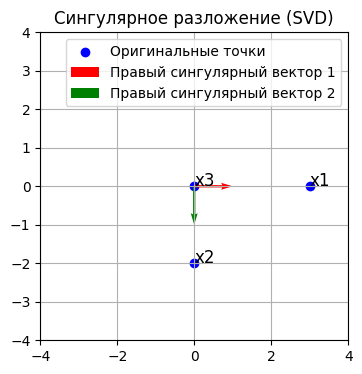

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Исходная матрица A
A = np.array([
    [3, 0],
    [0, -2],
    [0, 0]
])

# Вычисление SVD
U, D, Wt = svd(A)

# Создаем прямоугольную диагональную матрицу D
D_matrix = np.zeros((U.shape[0], Wt.shape[0]))  # Создаем матрицу нулей размером 3x2
D_matrix[:len(D), :len(D)] = np.diag(D)  # Заполняем диагональ сингулярными значениями

# Восстановление матрицы A
A_reconstructed = U @ D_matrix @ Wt

# Визуализация
print("Матрица U (левые сингулярные векторы):")
print(U)
print("\nМатрица D (сингулярные значения):")
print(D_matrix)
print("\nМатрица W^T (правые сингулярные векторы):")
print(Wt)
print("\nВосстановленная матрица A:")
print(A_reconstructed)

# Визуализация сингулярных векторов
fig, ax = plt.subplots(figsize=(8, 4))

# Оригинальные данные
ax.scatter(A[:, 0], A[:, 1], color='blue', label='Оригинальные точки')
for i in range(A.shape[0]):
    ax.text(A[i, 0], A[i, 1], f'x{i+1}', fontsize=12)

# Сингулярные векторы
origin = np.zeros(2)
ax.quiver(*origin, Wt[0, 0], Wt[0, 1], angles='xy', scale_units='xy', scale=1, color='red', label='Правый сингулярный вектор 1')
ax.quiver(*origin, Wt[1, 0], Wt[1, 1], angles='xy', scale_units='xy', scale=1, color='green', label='Правый сингулярный вектор 2')

# Настройки графика
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')
ax.legend()
ax.set_title("Сингулярное разложение (SVD)")
plt.grid()
plt.show()



### Пример 2: Метод главных компонент (PCA)



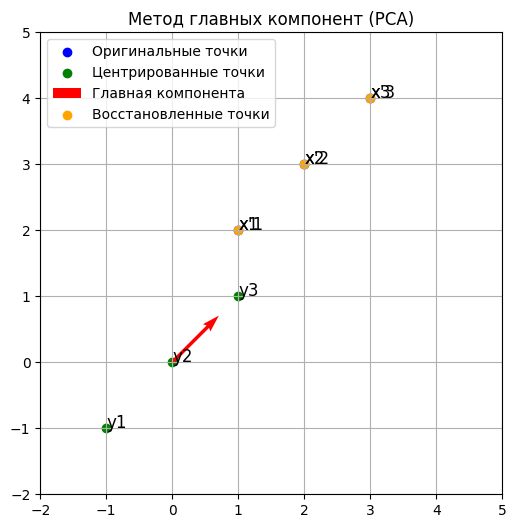

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

# Исходные данные
X = np.array([
    [1, 2],
    [2, 3],
    [3, 4]
])

# Шаг 1: Вычисление выборочного среднего
mu_n = np.mean(X, axis=0)

# Шаг 2: Центрирование данных
Y = X - mu_n

# Шаг 3: Вычисление выборочной ковариационной матрицы
Sigma_n = (Y.T @ Y) / Y.shape[0]

# Шаг 4: Нахождение собственных значений и собственных векторов
eigenvalues, eigenvectors = np.linalg.eig(Sigma_n)

# Шаг 5: Выбор главной компоненты
v1 = eigenvectors[:, np.argmax(eigenvalues)]  # Главная компонента

# Шаг 6: Проекция данных на главную компоненту
alpha = Y @ v1

# Шаг 7: Восстановление данных
Y_reconstructed = np.outer(alpha, v1)
X_reconstructed = Y_reconstructed + mu_n

# Визуализация
fig, ax = plt.subplots(figsize=(8, 6))

# Оригинальные данные
ax.scatter(X[:, 0], X[:, 1], color='blue', label='Оригинальные точки')
for i in range(X.shape[0]):
    ax.text(X[i, 0], X[i, 1], f'x{i+1}', fontsize=12)

# Центрированные данные
ax.scatter(Y[:, 0], Y[:, 1], color='green', label='Центрированные точки')
for i in range(Y.shape[0]):
    ax.text(Y[i, 0], Y[i, 1], f'y{i+1}', fontsize=12)

# Главная компонента
origin = np.zeros(2)
ax.quiver(*origin, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='red', label='Главная компонента')

# Восстановленные данные
ax.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], color='orange', label='Восстановленные точки')
for i in range(X_reconstructed.shape[0]):
    ax.text(X_reconstructed[i, 0], X_reconstructed[i, 1], f'x\'{i+1}', fontsize=12)

# Настройки графика
ax.set_xlim(-2, 5)
ax.set_ylim(-2, 5)
ax.set_aspect('equal')
ax.legend()
ax.set_title("Метод главных компонент (PCA)")
plt.grid()
plt.show()